In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Germany/GER_wuerttemberg_culex_2010_2022.csv')
columns = ['x', 'y', 'dt_placement',
           'culex.spp', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/germany_wuerttemberg_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/germany_wuerttemberg_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['station_id', 'x', 'y', 'dt_placement', 'week', 'month', 'year',
       'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code', 'nuts1_name',
       'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex.spp',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_minus_7_avail

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN class regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Germany/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 457.68999 | Val Loss: 20279.57643 | Train Acc: 8.451| Val Acc: 23.828
Epoch 002: | Train Loss: 413.39203 | Val Loss: 19816.46451 | Train Acc: 8.144| Val Acc: 23.526
Epoch 003: | Train Loss: 357.71739 | Val Loss: 19482.26052 | Train Acc: 7.860| Val Acc: 23.117
Epoch 004: | Train Loss: 316.61275 | Val Loss: 19267.75267 | Train Acc: 7.501| Val Acc: 22.846
Epoch 005: | Train Loss: 287.67728 | Val Loss: 19063.13636 | Train Acc: 7.279| Val Acc: 22.676
Epoch 006: | Train Loss: 257.60716 | Val Loss: 18858.32846 | Train Acc: 7.100| Val Acc: 22.541
Epoch 007: | Train Loss: 236.16512 | Val Loss: 18580.69941 | Train Acc: 6.905| Val Acc: 22.419
Epoch 008: | Train Loss: 219.61028 | Val Loss: 18494.15955 | Train Acc: 6.737| Val Acc: 22.339
Epoch 009: | Train Loss: 197.05778 | Val Loss: 18416.76558 | Train Acc: 6.500| Val Acc: 22.357
Epoch 010: | Train Loss: 185.51204 | Val Loss: 18324.53073 | Train Acc: 6.331| Val Acc: 22.243
Epoch 011: | Train Loss: 176.61626 | Val Loss: 182

Epoch 088: | Train Loss: 65.44329 | Val Loss: 17770.27585 | Train Acc: 4.249| Val Acc: 21.596
Epoch 089: | Train Loss: 65.19644 | Val Loss: 17751.09505 | Train Acc: 4.229| Val Acc: 21.532
Epoch 090: | Train Loss: 64.65623 | Val Loss: 17848.69443 | Train Acc: 4.249| Val Acc: 21.675
Epoch 091: | Train Loss: 62.87253 | Val Loss: 17738.43086 | Train Acc: 4.172| Val Acc: 21.546
Epoch 092: | Train Loss: 63.94008 | Val Loss: 17732.21559 | Train Acc: 4.176| Val Acc: 21.574
Epoch 093: | Train Loss: 63.94631 | Val Loss: 17750.05727 | Train Acc: 4.189| Val Acc: 21.477
Epoch 094: | Train Loss: 61.30318 | Val Loss: 17729.38730 | Train Acc: 4.124| Val Acc: 21.577
Epoch 095: | Train Loss: 63.01875 | Val Loss: 17753.32011 | Train Acc: 4.144| Val Acc: 21.508
Epoch 096: | Train Loss: 60.82003 | Val Loss: 17813.52201 | Train Acc: 4.139| Val Acc: 21.504
Epoch 097: | Train Loss: 64.86273 | Val Loss: 17754.87185 | Train Acc: 4.259| Val Acc: 21.489
Epoch 098: | Train Loss: 63.67597 | Val Loss: 17806.10867 | 

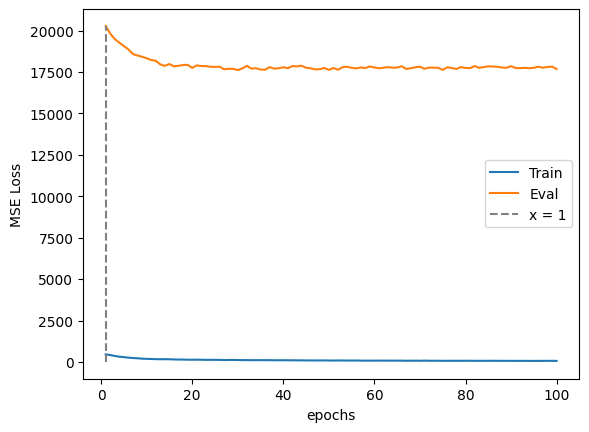

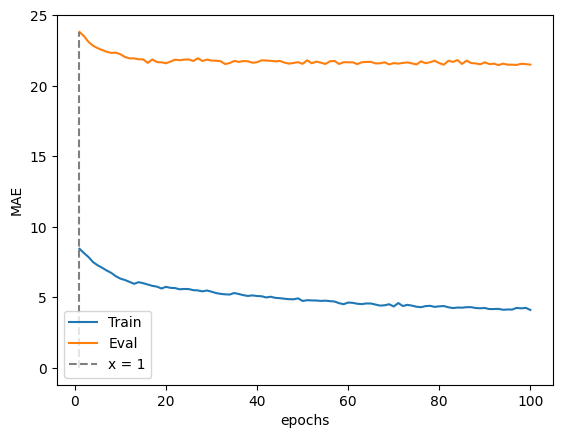

MAE on train set:  2.8118727311552423
min prediction: 0
max prediction: 100

MAE on test set:  21.582967515364356
Error <= 30: 92.19 %
min prediction: 0
max prediction: 91


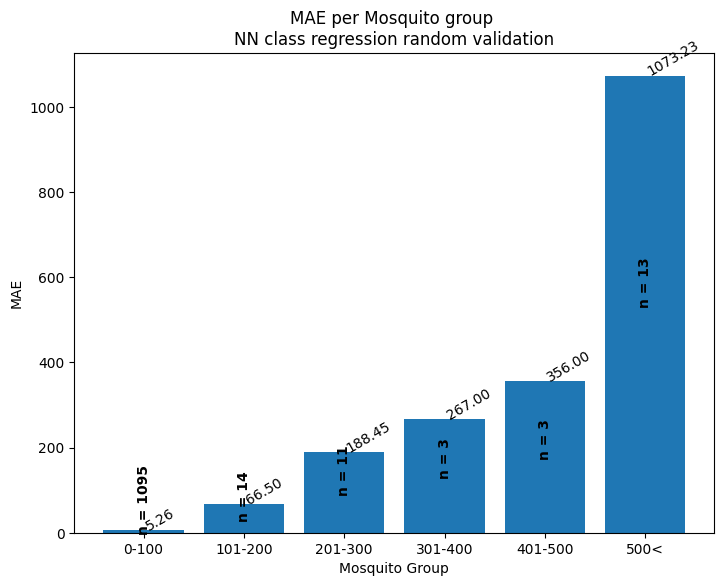

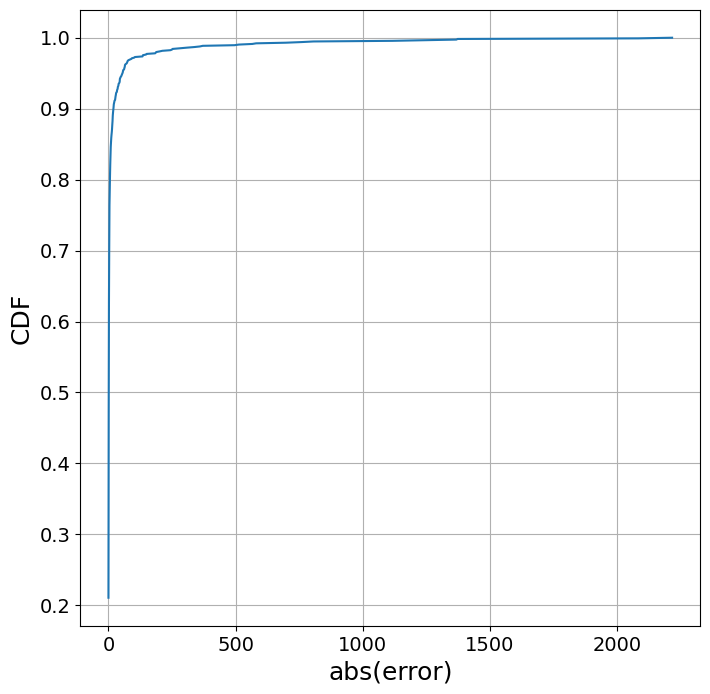

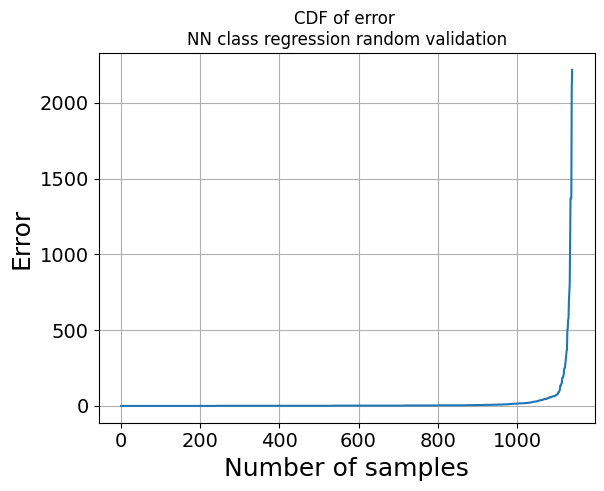

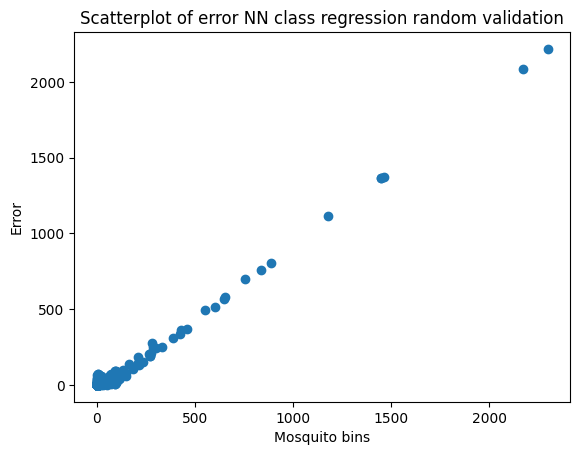

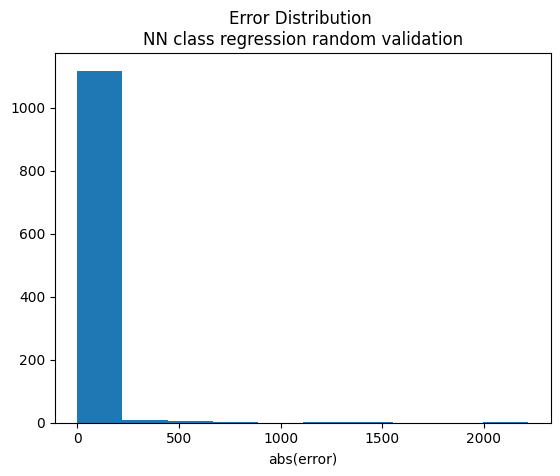

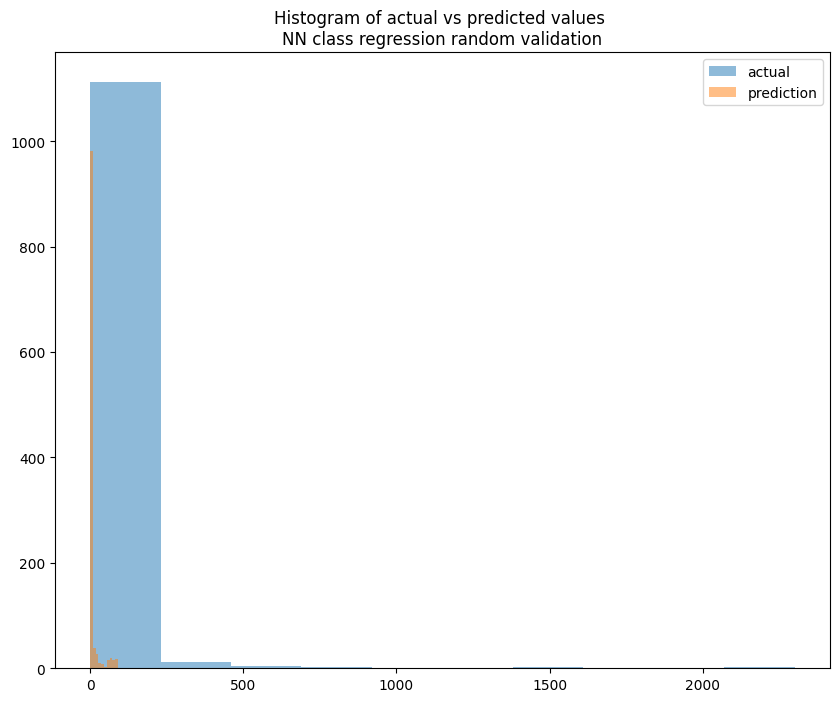

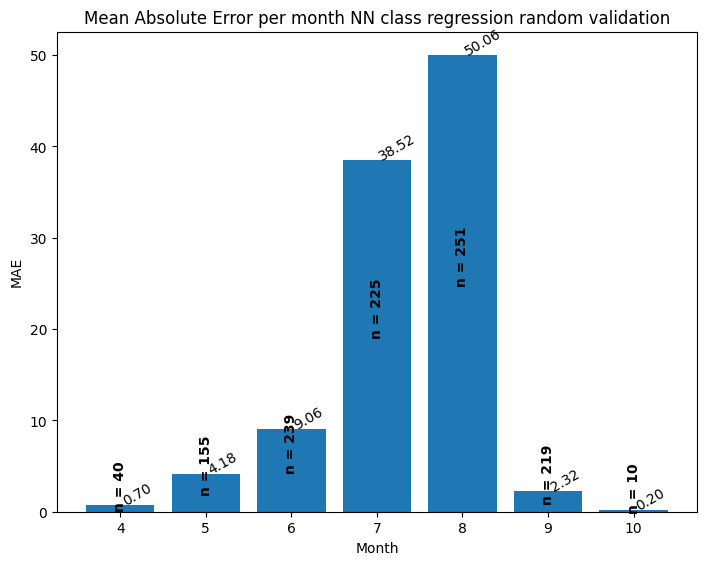

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 397.62425 | Val Loss: 31042.28521 | Train Acc: 7.938| Val Acc: 32.225
Epoch 002: | Train Loss: 351.04113 | Val Loss: 30276.37944 | Train Acc: 7.596| Val Acc: 31.521
Epoch 003: | Train Loss: 300.11310 | Val Loss: 29679.22124 | Train Acc: 7.236| Val Acc: 30.782
Epoch 004: | Train Loss: 258.53292 | Val Loss: 29194.26047 | Train Acc: 6.961| Val Acc: 30.513
Epoch 005: | Train Loss: 236.23532 | Val Loss: 29032.90869 | Train Acc: 6.784| Val Acc: 30.119
Epoch 006: | Train Loss: 211.48685 | Val Loss: 28736.18118 | Train Acc: 6.529| Val Acc: 30.093
Epoch 007: | Train Loss: 190.11282 | Val Loss: 28297.90879 | Train Acc: 6.341| Val Acc: 30.162
Epoch 008: | Train Loss: 185.64186 | Val Loss: 28090.05295 | Train Acc: 6.361| Val Acc: 30.098
Epoch 009: | Train Loss: 166.18489 | Val Loss: 27756.61875 | Train Acc: 6.096| Val Acc: 29.863
Epoch 010: | Train Loss: 165.90573 | Val Loss: 27905.52241 | Train Acc: 6.151| Val Acc: 29.749
Epoch 011: | Train Loss: 152.45468 | Val Loss: 276

Epoch 088: | Train Loss: 56.33345 | Val Loss: 27541.60994 | Train Acc: 4.003| Val Acc: 29.339
Epoch 089: | Train Loss: 55.58638 | Val Loss: 27615.54893 | Train Acc: 3.964| Val Acc: 29.215
Epoch 090: | Train Loss: 57.77121 | Val Loss: 27485.94390 | Train Acc: 3.996| Val Acc: 29.402
Epoch 091: | Train Loss: 54.66769 | Val Loss: 27456.00408 | Train Acc: 3.893| Val Acc: 29.358
Epoch 092: | Train Loss: 58.09748 | Val Loss: 27671.30559 | Train Acc: 3.972| Val Acc: 29.264
Epoch 093: | Train Loss: 55.97243 | Val Loss: 27580.31914 | Train Acc: 3.984| Val Acc: 29.299
Epoch 094: | Train Loss: 56.49859 | Val Loss: 27609.11487 | Train Acc: 4.037| Val Acc: 29.250
Epoch 095: | Train Loss: 56.01058 | Val Loss: 27728.64768 | Train Acc: 3.996| Val Acc: 29.292
Epoch 096: | Train Loss: 51.69020 | Val Loss: 27489.92417 | Train Acc: 3.789| Val Acc: 29.145
Epoch 097: | Train Loss: 55.19203 | Val Loss: 27547.25364 | Train Acc: 3.922| Val Acc: 29.240
Epoch 098: | Train Loss: 54.09092 | Val Loss: 27595.69761 | 

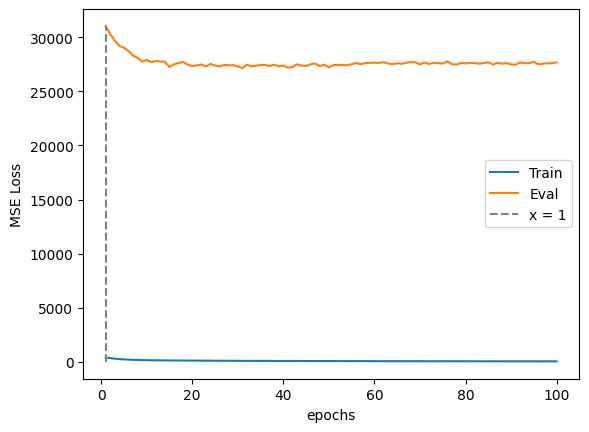

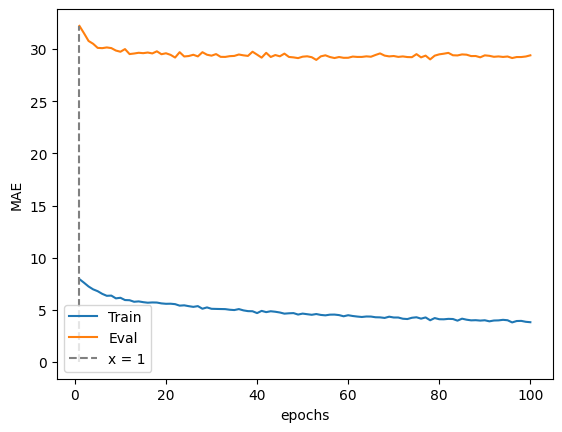

Epoch 001: | Train Loss: 458.79409 | Val Loss: 20018.30300 | Train Acc: 8.488| Val Acc: 23.492
Epoch 002: | Train Loss: 411.96097 | Val Loss: 19543.88794 | Train Acc: 8.205| Val Acc: 23.011
Epoch 003: | Train Loss: 352.61221 | Val Loss: 19210.23652 | Train Acc: 7.744| Val Acc: 22.693
Epoch 004: | Train Loss: 307.12876 | Val Loss: 19006.52363 | Train Acc: 7.386| Val Acc: 22.571
Epoch 005: | Train Loss: 279.59173 | Val Loss: 18803.21316 | Train Acc: 7.224| Val Acc: 22.475
Epoch 006: | Train Loss: 241.63788 | Val Loss: 18641.32063 | Train Acc: 6.868| Val Acc: 22.219
Epoch 007: | Train Loss: 222.86897 | Val Loss: 18327.31521 | Train Acc: 6.629| Val Acc: 22.201
Epoch 008: | Train Loss: 207.68199 | Val Loss: 18249.40215 | Train Acc: 6.471| Val Acc: 21.966
Epoch 009: | Train Loss: 200.08753 | Val Loss: 18013.80676 | Train Acc: 6.581| Val Acc: 21.958
Epoch 010: | Train Loss: 183.95389 | Val Loss: 18084.90574 | Train Acc: 6.341| Val Acc: 21.788
Epoch 011: | Train Loss: 173.99469 | Val Loss: 180

Epoch 088: | Train Loss: 60.61151 | Val Loss: 17570.16241 | Train Acc: 4.023| Val Acc: 21.278
Epoch 089: | Train Loss: 59.56929 | Val Loss: 17530.61589 | Train Acc: 3.983| Val Acc: 20.990
Epoch 090: | Train Loss: 58.00213 | Val Loss: 17695.49188 | Train Acc: 4.020| Val Acc: 20.904
Epoch 091: | Train Loss: 60.44736 | Val Loss: 17627.54003 | Train Acc: 4.038| Val Acc: 21.018
Epoch 092: | Train Loss: 58.99591 | Val Loss: 17538.18322 | Train Acc: 3.959| Val Acc: 21.103
Epoch 093: | Train Loss: 61.97125 | Val Loss: 17581.56997 | Train Acc: 4.109| Val Acc: 21.266
Epoch 094: | Train Loss: 56.29942 | Val Loss: 17515.04834 | Train Acc: 3.945| Val Acc: 21.103
Epoch 095: | Train Loss: 57.83398 | Val Loss: 17744.96123 | Train Acc: 3.981| Val Acc: 21.090
Epoch 096: | Train Loss: 60.65389 | Val Loss: 17689.00350 | Train Acc: 4.112| Val Acc: 21.217
Epoch 097: | Train Loss: 57.40741 | Val Loss: 17696.39780 | Train Acc: 4.024| Val Acc: 21.005
Epoch 098: | Train Loss: 55.43144 | Val Loss: 17651.14567 | 

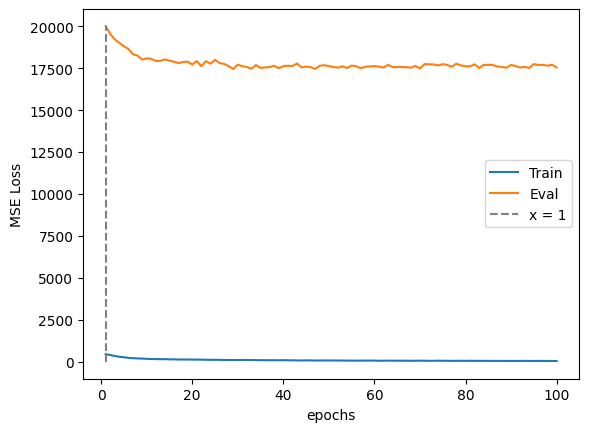

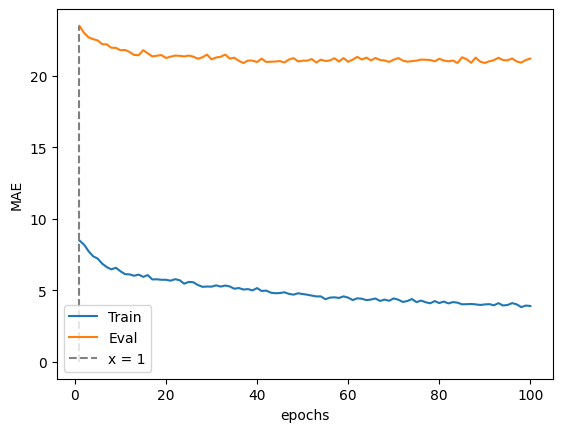

Epoch 001: | Train Loss: 408.00190 | Val Loss: 29628.59604 | Train Acc: 8.026| Val Acc: 31.477
Epoch 002: | Train Loss: 361.59999 | Val Loss: 28998.99885 | Train Acc: 7.715| Val Acc: 30.835
Epoch 003: | Train Loss: 305.89704 | Val Loss: 28551.34259 | Train Acc: 7.308| Val Acc: 30.397
Epoch 004: | Train Loss: 269.85231 | Val Loss: 28262.14479 | Train Acc: 7.004| Val Acc: 30.047
Epoch 005: | Train Loss: 246.67506 | Val Loss: 27975.34696 | Train Acc: 6.850| Val Acc: 29.820
Epoch 006: | Train Loss: 220.55515 | Val Loss: 27846.16400 | Train Acc: 6.677| Val Acc: 29.675
Epoch 007: | Train Loss: 206.94514 | Val Loss: 27562.13162 | Train Acc: 6.530| Val Acc: 29.398
Epoch 008: | Train Loss: 187.43111 | Val Loss: 27276.00640 | Train Acc: 6.377| Val Acc: 29.122
Epoch 009: | Train Loss: 180.16925 | Val Loss: 27127.74089 | Train Acc: 6.243| Val Acc: 29.003
Epoch 010: | Train Loss: 172.68299 | Val Loss: 26792.75042 | Train Acc: 6.229| Val Acc: 28.655
Epoch 011: | Train Loss: 166.70419 | Val Loss: 269

Epoch 088: | Train Loss: 59.50814 | Val Loss: 26721.47546 | Train Acc: 4.136| Val Acc: 28.691
Epoch 089: | Train Loss: 61.72281 | Val Loss: 26634.36470 | Train Acc: 4.190| Val Acc: 28.424
Epoch 090: | Train Loss: 56.45921 | Val Loss: 26616.16836 | Train Acc: 4.029| Val Acc: 28.356
Epoch 091: | Train Loss: 58.75368 | Val Loss: 26725.54398 | Train Acc: 4.064| Val Acc: 28.488
Epoch 092: | Train Loss: 60.70705 | Val Loss: 26669.89341 | Train Acc: 4.181| Val Acc: 28.592
Epoch 093: | Train Loss: 60.95582 | Val Loss: 26712.06779 | Train Acc: 4.094| Val Acc: 28.748
Epoch 094: | Train Loss: 61.91169 | Val Loss: 26752.65181 | Train Acc: 4.144| Val Acc: 28.822
Epoch 095: | Train Loss: 56.44392 | Val Loss: 26730.21799 | Train Acc: 4.014| Val Acc: 28.486
Epoch 096: | Train Loss: 57.23865 | Val Loss: 26849.16810 | Train Acc: 3.990| Val Acc: 28.702
Epoch 097: | Train Loss: 54.04667 | Val Loss: 26689.95427 | Train Acc: 3.921| Val Acc: 28.370
Epoch 098: | Train Loss: 56.46987 | Val Loss: 26748.57850 | 

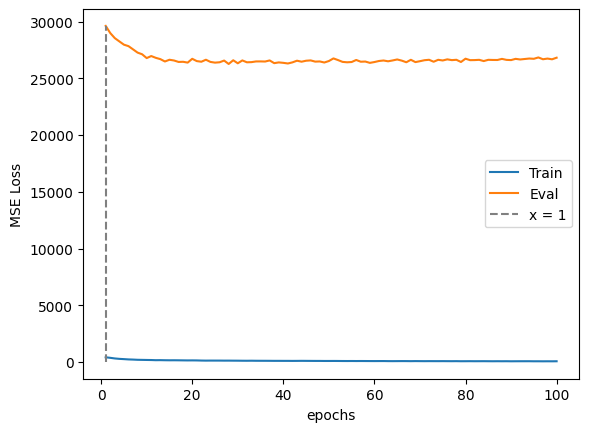

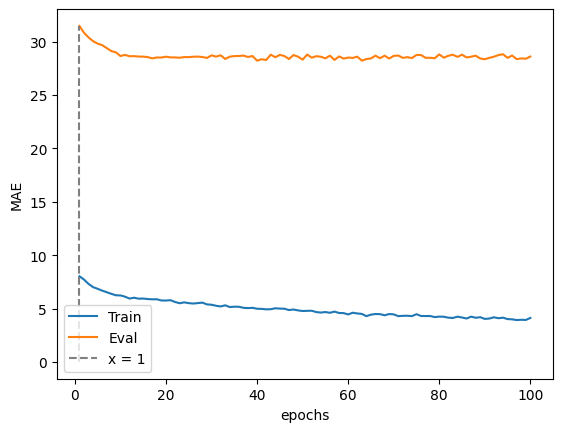

Epoch 001: | Train Loss: 446.57360 | Val Loss: 16762.67739 | Train Acc: 8.277| Val Acc: 20.194
Epoch 002: | Train Loss: 396.15946 | Val Loss: 16298.73053 | Train Acc: 7.973| Val Acc: 19.981
Epoch 003: | Train Loss: 338.50876 | Val Loss: 15997.90706 | Train Acc: 7.597| Val Acc: 19.570
Epoch 004: | Train Loss: 305.97437 | Val Loss: 15858.12130 | Train Acc: 7.336| Val Acc: 19.287
Epoch 005: | Train Loss: 270.82643 | Val Loss: 15589.91077 | Train Acc: 7.036| Val Acc: 19.075
Epoch 006: | Train Loss: 249.79758 | Val Loss: 15547.54819 | Train Acc: 6.938| Val Acc: 18.999
Epoch 007: | Train Loss: 224.94079 | Val Loss: 15360.89775 | Train Acc: 6.755| Val Acc: 18.850
Epoch 008: | Train Loss: 208.72546 | Val Loss: 15319.67397 | Train Acc: 6.556| Val Acc: 18.817
Epoch 009: | Train Loss: 203.02769 | Val Loss: 15196.15939 | Train Acc: 6.530| Val Acc: 18.582
Epoch 010: | Train Loss: 191.38596 | Val Loss: 15143.97965 | Train Acc: 6.498| Val Acc: 18.560
Epoch 011: | Train Loss: 185.12705 | Val Loss: 148

Epoch 088: | Train Loss: 62.32523 | Val Loss: 14748.83752 | Train Acc: 4.225| Val Acc: 17.228
Epoch 089: | Train Loss: 62.18304 | Val Loss: 14815.42445 | Train Acc: 4.127| Val Acc: 17.425
Epoch 090: | Train Loss: 59.95912 | Val Loss: 14731.32311 | Train Acc: 4.080| Val Acc: 17.274
Epoch 091: | Train Loss: 58.80566 | Val Loss: 14783.22112 | Train Acc: 4.132| Val Acc: 17.267
Epoch 092: | Train Loss: 57.84956 | Val Loss: 14789.67778 | Train Acc: 4.078| Val Acc: 17.236
Epoch 093: | Train Loss: 60.10968 | Val Loss: 14730.93265 | Train Acc: 4.084| Val Acc: 17.219
Epoch 094: | Train Loss: 59.97223 | Val Loss: 14747.54519 | Train Acc: 4.141| Val Acc: 17.175
Epoch 095: | Train Loss: 57.89769 | Val Loss: 14726.41243 | Train Acc: 4.018| Val Acc: 17.100
Epoch 096: | Train Loss: 60.99179 | Val Loss: 14813.99462 | Train Acc: 4.071| Val Acc: 17.243
Epoch 097: | Train Loss: 59.51574 | Val Loss: 14745.91547 | Train Acc: 4.099| Val Acc: 17.158
Epoch 098: | Train Loss: 59.92375 | Val Loss: 14734.87286 | 

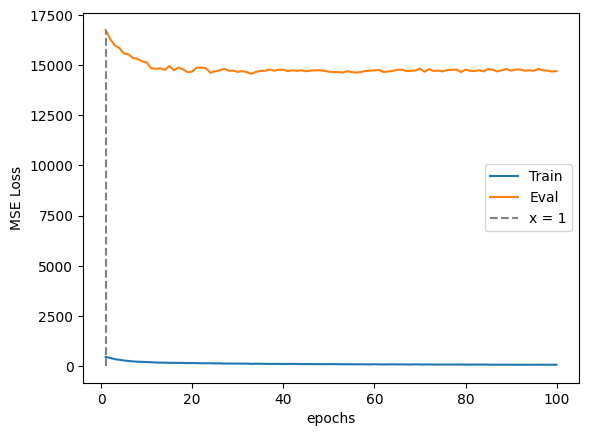

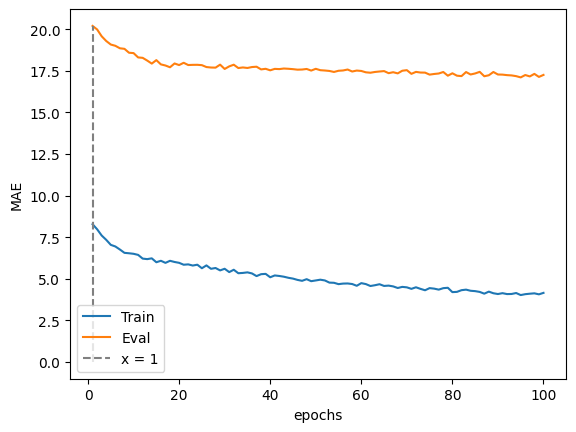

Epoch 001: | Train Loss: 421.38647 | Val Loss: 24374.32451 | Train Acc: 8.042| Val Acc: 29.097
Epoch 002: | Train Loss: 373.52771 | Val Loss: 23761.71378 | Train Acc: 7.723| Val Acc: 28.644
Epoch 003: | Train Loss: 318.69388 | Val Loss: 23292.68523 | Train Acc: 7.342| Val Acc: 28.231
Epoch 004: | Train Loss: 282.52089 | Val Loss: 23287.73328 | Train Acc: 7.062| Val Acc: 28.128
Epoch 005: | Train Loss: 257.54104 | Val Loss: 22947.71243 | Train Acc: 6.935| Val Acc: 27.830
Epoch 006: | Train Loss: 231.49189 | Val Loss: 22827.42343 | Train Acc: 6.729| Val Acc: 27.674
Epoch 007: | Train Loss: 206.39659 | Val Loss: 22549.97251 | Train Acc: 6.463| Val Acc: 27.499
Epoch 008: | Train Loss: 196.23411 | Val Loss: 22383.49766 | Train Acc: 6.356| Val Acc: 27.419
Epoch 009: | Train Loss: 180.55681 | Val Loss: 22193.55997 | Train Acc: 6.203| Val Acc: 27.191
Epoch 010: | Train Loss: 173.35841 | Val Loss: 22269.14263 | Train Acc: 6.128| Val Acc: 27.300
Epoch 011: | Train Loss: 169.32668 | Val Loss: 220

Epoch 088: | Train Loss: 61.21163 | Val Loss: 21537.98927 | Train Acc: 4.174| Val Acc: 26.243
Epoch 089: | Train Loss: 60.62824 | Val Loss: 21710.82827 | Train Acc: 4.121| Val Acc: 26.502
Epoch 090: | Train Loss: 62.38274 | Val Loss: 21524.89854 | Train Acc: 4.161| Val Acc: 26.304
Epoch 091: | Train Loss: 60.54032 | Val Loss: 21661.13430 | Train Acc: 4.126| Val Acc: 26.255
Epoch 092: | Train Loss: 56.01698 | Val Loss: 21555.20591 | Train Acc: 3.995| Val Acc: 26.279
Epoch 093: | Train Loss: 60.97160 | Val Loss: 21575.32410 | Train Acc: 4.091| Val Acc: 26.120
Epoch 094: | Train Loss: 62.65814 | Val Loss: 21514.57798 | Train Acc: 4.173| Val Acc: 26.137
Epoch 095: | Train Loss: 55.87529 | Val Loss: 21700.79398 | Train Acc: 4.014| Val Acc: 26.150
Epoch 096: | Train Loss: 59.36798 | Val Loss: 21334.29809 | Train Acc: 4.087| Val Acc: 26.046
Epoch 097: | Train Loss: 60.26969 | Val Loss: 21668.21360 | Train Acc: 4.107| Val Acc: 26.318
Epoch 098: | Train Loss: 58.54338 | Val Loss: 21507.33436 | 

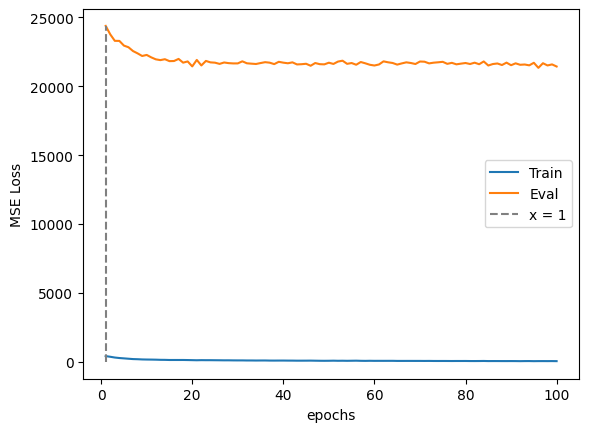

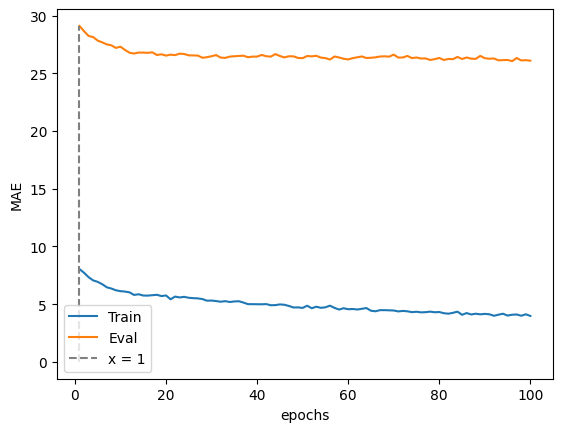

Epoch 001: | Train Loss: 422.11856 | Val Loss: 26468.31468 | Train Acc: 8.189| Val Acc: 24.010
Epoch 002: | Train Loss: 375.95573 | Val Loss: 26104.83217 | Train Acc: 7.906| Val Acc: 23.718
Epoch 003: | Train Loss: 317.47159 | Val Loss: 25851.59330 | Train Acc: 7.491| Val Acc: 23.535
Epoch 004: | Train Loss: 282.94047 | Val Loss: 25783.05490 | Train Acc: 7.209| Val Acc: 23.461
Epoch 005: | Train Loss: 251.57104 | Val Loss: 25474.79688 | Train Acc: 7.019| Val Acc: 23.302
Epoch 006: | Train Loss: 224.59107 | Val Loss: 25360.43633 | Train Acc: 6.743| Val Acc: 23.115
Epoch 007: | Train Loss: 208.03803 | Val Loss: 25138.04398 | Train Acc: 6.579| Val Acc: 23.105
Epoch 008: | Train Loss: 197.44325 | Val Loss: 25138.96890 | Train Acc: 6.497| Val Acc: 23.134
Epoch 009: | Train Loss: 174.39212 | Val Loss: 24950.47245 | Train Acc: 6.200| Val Acc: 22.862
Epoch 010: | Train Loss: 174.70962 | Val Loss: 24884.07028 | Train Acc: 6.317| Val Acc: 22.739
Epoch 011: | Train Loss: 161.65608 | Val Loss: 248

Epoch 088: | Train Loss: 55.69395 | Val Loss: 24256.04629 | Train Acc: 3.932| Val Acc: 21.807
Epoch 089: | Train Loss: 58.65457 | Val Loss: 24196.55230 | Train Acc: 4.045| Val Acc: 22.072
Epoch 090: | Train Loss: 57.01431 | Val Loss: 24124.17328 | Train Acc: 4.021| Val Acc: 21.785
Epoch 091: | Train Loss: 59.02395 | Val Loss: 24240.17623 | Train Acc: 4.069| Val Acc: 21.912
Epoch 092: | Train Loss: 57.73961 | Val Loss: 24211.53318 | Train Acc: 4.036| Val Acc: 22.128
Epoch 093: | Train Loss: 57.00600 | Val Loss: 24154.44297 | Train Acc: 4.022| Val Acc: 21.851
Epoch 094: | Train Loss: 57.97950 | Val Loss: 24284.08914 | Train Acc: 3.982| Val Acc: 21.891
Epoch 095: | Train Loss: 60.25652 | Val Loss: 24223.20022 | Train Acc: 4.111| Val Acc: 21.831
Epoch 096: | Train Loss: 55.52051 | Val Loss: 24169.62333 | Train Acc: 3.978| Val Acc: 21.946
Epoch 097: | Train Loss: 57.34679 | Val Loss: 24128.50371 | Train Acc: 4.059| Val Acc: 21.870
Epoch 098: | Train Loss: 56.06891 | Val Loss: 24134.63307 | 

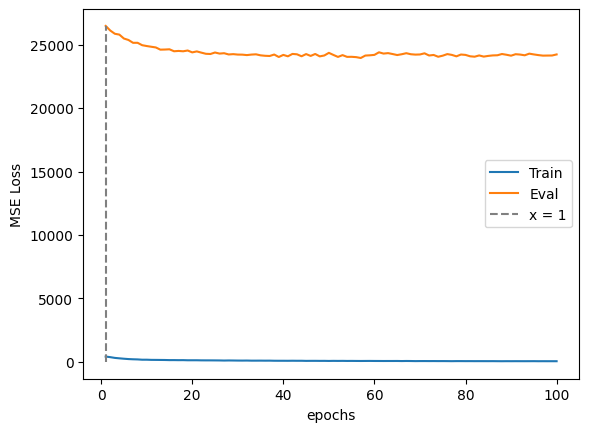

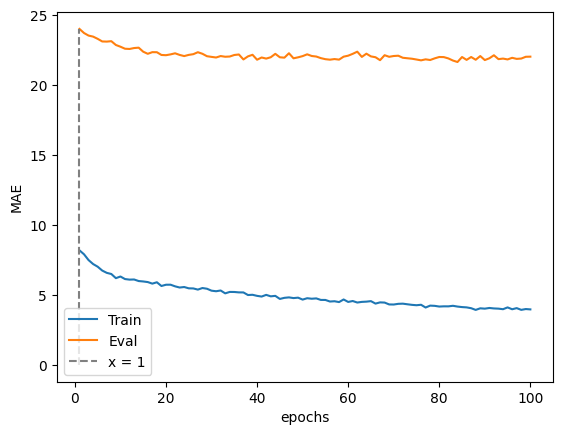

Epoch 001: | Train Loss: 407.61448 | Val Loss: 74179.31973 | Train Acc: 8.018| Val Acc: 36.002
Epoch 002: | Train Loss: 362.94966 | Val Loss: 73334.73524 | Train Acc: 7.718| Val Acc: 35.483
Epoch 003: | Train Loss: 304.65429 | Val Loss: 72776.02638 | Train Acc: 7.343| Val Acc: 35.005
Epoch 004: | Train Loss: 267.87839 | Val Loss: 72408.62316 | Train Acc: 6.965| Val Acc: 34.783
Epoch 005: | Train Loss: 241.91752 | Val Loss: 72143.55333 | Train Acc: 6.802| Val Acc: 34.615
Epoch 006: | Train Loss: 220.85082 | Val Loss: 71978.78625 | Train Acc: 6.630| Val Acc: 34.547
Epoch 007: | Train Loss: 196.51568 | Val Loss: 71510.62607 | Train Acc: 6.389| Val Acc: 34.201
Epoch 008: | Train Loss: 186.13721 | Val Loss: 71482.27274 | Train Acc: 6.321| Val Acc: 34.095
Epoch 009: | Train Loss: 171.11081 | Val Loss: 71170.69222 | Train Acc: 6.171| Val Acc: 34.005
Epoch 010: | Train Loss: 162.65399 | Val Loss: 70925.06328 | Train Acc: 6.044| Val Acc: 34.117
Epoch 011: | Train Loss: 152.92392 | Val Loss: 708

Epoch 088: | Train Loss: 55.36967 | Val Loss: 70031.65461 | Train Acc: 3.899| Val Acc: 32.962
Epoch 089: | Train Loss: 54.98426 | Val Loss: 70145.85548 | Train Acc: 3.906| Val Acc: 32.798
Epoch 090: | Train Loss: 51.85463 | Val Loss: 70082.41466 | Train Acc: 3.883| Val Acc: 32.970
Epoch 091: | Train Loss: 52.69372 | Val Loss: 70081.58224 | Train Acc: 3.908| Val Acc: 33.057
Epoch 092: | Train Loss: 55.75981 | Val Loss: 70073.55763 | Train Acc: 3.990| Val Acc: 33.123
Epoch 093: | Train Loss: 49.59191 | Val Loss: 70094.39767 | Train Acc: 3.726| Val Acc: 32.871
Epoch 094: | Train Loss: 53.94464 | Val Loss: 70202.44588 | Train Acc: 3.905| Val Acc: 33.018
Epoch 095: | Train Loss: 50.53162 | Val Loss: 70291.35756 | Train Acc: 3.829| Val Acc: 32.975
Epoch 096: | Train Loss: 52.92605 | Val Loss: 70257.87364 | Train Acc: 3.878| Val Acc: 32.904
Epoch 097: | Train Loss: 48.99615 | Val Loss: 70088.47440 | Train Acc: 3.784| Val Acc: 33.128
Epoch 098: | Train Loss: 52.52181 | Val Loss: 70066.73878 | 

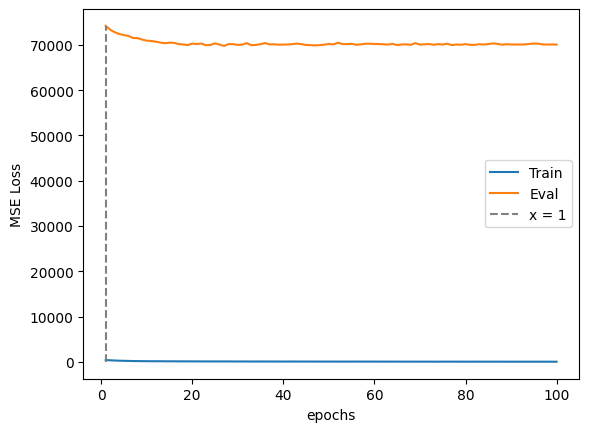

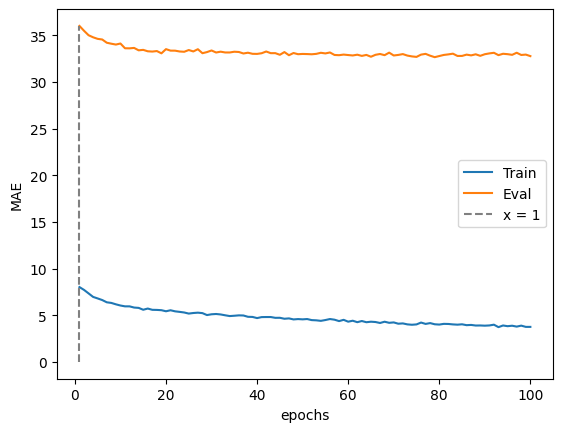

Epoch 001: | Train Loss: 404.31582 | Val Loss: 109629.90977 | Train Acc: 7.931| Val Acc: 47.271
Epoch 002: | Train Loss: 354.84163 | Val Loss: 108362.18296 | Train Acc: 7.589| Val Acc: 46.625
Epoch 003: | Train Loss: 301.44576 | Val Loss: 107735.43611 | Train Acc: 7.250| Val Acc: 46.112
Epoch 004: | Train Loss: 262.15122 | Val Loss: 107121.82810 | Train Acc: 6.934| Val Acc: 45.660
Epoch 005: | Train Loss: 237.91293 | Val Loss: 106608.11238 | Train Acc: 6.745| Val Acc: 45.363
Epoch 006: | Train Loss: 216.40930 | Val Loss: 105945.36174 | Train Acc: 6.600| Val Acc: 45.001
Epoch 007: | Train Loss: 199.27020 | Val Loss: 105838.31616 | Train Acc: 6.451| Val Acc: 44.954
Epoch 008: | Train Loss: 179.19242 | Val Loss: 105716.72634 | Train Acc: 6.207| Val Acc: 44.826
Epoch 009: | Train Loss: 168.67563 | Val Loss: 105103.19783 | Train Acc: 6.121| Val Acc: 44.557
Epoch 010: | Train Loss: 160.04033 | Val Loss: 104541.98381 | Train Acc: 6.035| Val Acc: 44.406
Epoch 011: | Train Loss: 157.29743 | Val

Epoch 087: | Train Loss: 59.58362 | Val Loss: 103854.62388 | Train Acc: 4.134| Val Acc: 43.848
Epoch 088: | Train Loss: 58.25345 | Val Loss: 104242.22236 | Train Acc: 3.999| Val Acc: 43.978
Epoch 089: | Train Loss: 54.61213 | Val Loss: 103950.41501 | Train Acc: 3.931| Val Acc: 43.828
Epoch 090: | Train Loss: 56.50148 | Val Loss: 104171.80518 | Train Acc: 4.034| Val Acc: 43.760
Epoch 091: | Train Loss: 51.63946 | Val Loss: 104217.60242 | Train Acc: 3.853| Val Acc: 43.996
Epoch 092: | Train Loss: 57.59602 | Val Loss: 104152.97998 | Train Acc: 3.989| Val Acc: 43.957
Epoch 093: | Train Loss: 56.57882 | Val Loss: 104089.67637 | Train Acc: 4.045| Val Acc: 43.973
Epoch 094: | Train Loss: 54.00191 | Val Loss: 104091.35696 | Train Acc: 3.928| Val Acc: 43.798
Epoch 095: | Train Loss: 58.90808 | Val Loss: 104086.86521 | Train Acc: 4.009| Val Acc: 43.795
Epoch 096: | Train Loss: 55.58108 | Val Loss: 104378.99470 | Train Acc: 4.003| Val Acc: 43.916
Epoch 097: | Train Loss: 51.87426 | Val Loss: 1039

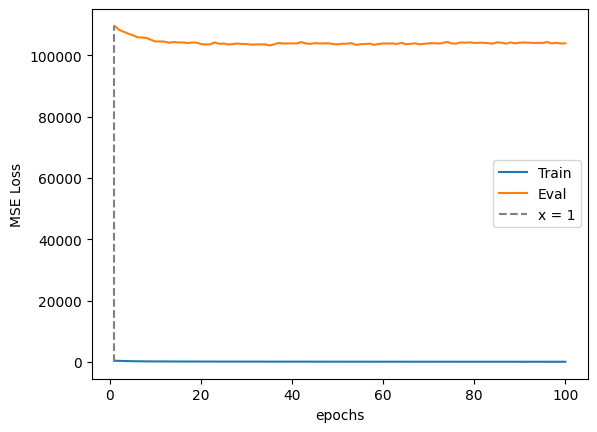

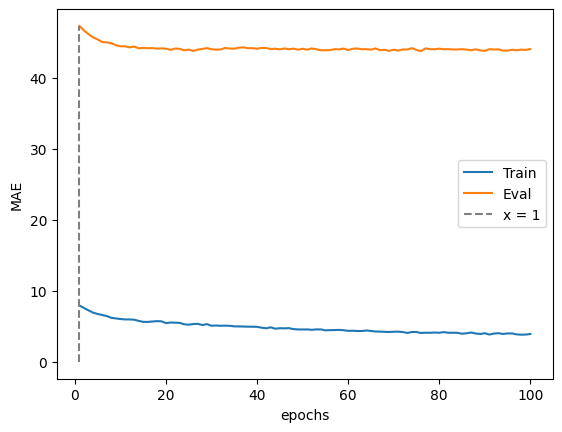

Epoch 001: | Train Loss: 550.80650 | Val Loss: 3328.51107 | Train Acc: 9.270| Val Acc: 12.230
Epoch 002: | Train Loss: 497.18450 | Val Loss: 3200.50127 | Train Acc: 8.937| Val Acc: 12.037
Epoch 003: | Train Loss: 429.44825 | Val Loss: 3118.40192 | Train Acc: 8.546| Val Acc: 11.637
Epoch 004: | Train Loss: 385.63934 | Val Loss: 3034.28423 | Train Acc: 8.157| Val Acc: 11.327
Epoch 005: | Train Loss: 359.63154 | Val Loss: 2994.15707 | Train Acc: 8.078| Val Acc: 11.175
Epoch 006: | Train Loss: 324.68892 | Val Loss: 2918.96938 | Train Acc: 7.761| Val Acc: 11.018
Epoch 007: | Train Loss: 303.99977 | Val Loss: 2836.94353 | Train Acc: 7.690| Val Acc: 10.865
Epoch 008: | Train Loss: 284.51887 | Val Loss: 2854.91909 | Train Acc: 7.478| Val Acc: 10.842
Epoch 009: | Train Loss: 258.88583 | Val Loss: 2756.38160 | Train Acc: 7.285| Val Acc: 10.764
Epoch 010: | Train Loss: 238.43023 | Val Loss: 2733.01070 | Train Acc: 7.086| Val Acc: 10.685
Epoch 011: | Train Loss: 239.43679 | Val Loss: 2712.42622 | 

Epoch 089: | Train Loss: 89.47951 | Val Loss: 2530.76015 | Train Acc: 4.841| Val Acc: 10.267
Epoch 090: | Train Loss: 81.57628 | Val Loss: 2534.26983 | Train Acc: 4.687| Val Acc: 10.192
Epoch 091: | Train Loss: 85.85187 | Val Loss: 2501.23653 | Train Acc: 4.818| Val Acc: 10.332
Epoch 092: | Train Loss: 82.05245 | Val Loss: 2508.03174 | Train Acc: 4.687| Val Acc: 10.168
Epoch 093: | Train Loss: 86.26335 | Val Loss: 2525.01624 | Train Acc: 4.762| Val Acc: 10.406
Epoch 094: | Train Loss: 78.46227 | Val Loss: 2512.61163 | Train Acc: 4.605| Val Acc: 10.223
Epoch 095: | Train Loss: 76.06395 | Val Loss: 2500.05814 | Train Acc: 4.630| Val Acc: 10.098
Epoch 096: | Train Loss: 79.91276 | Val Loss: 2533.84095 | Train Acc: 4.668| Val Acc: 10.160
Epoch 097: | Train Loss: 75.70617 | Val Loss: 2493.75059 | Train Acc: 4.485| Val Acc: 10.226
Epoch 098: | Train Loss: 74.67844 | Val Loss: 2515.99976 | Train Acc: 4.546| Val Acc: 10.090
Epoch 099: | Train Loss: 79.31724 | Val Loss: 2521.27131 | Train Acc: 

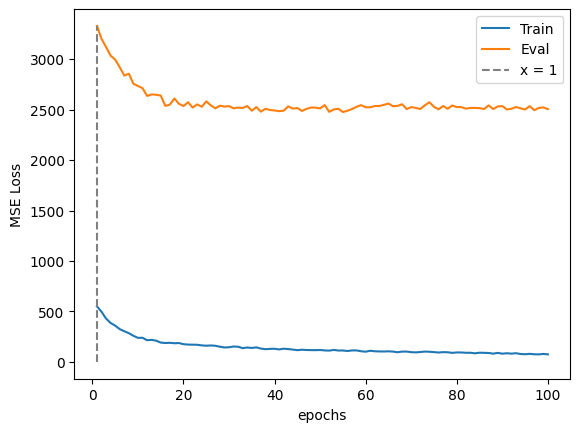

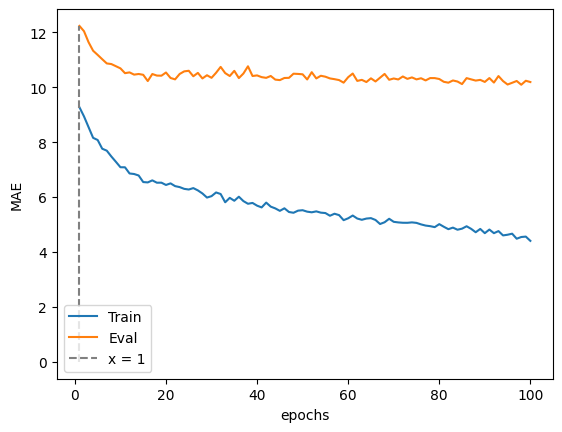

Epoch 001: | Train Loss: 497.25706 | Val Loss: 32549.35438 | Train Acc: 8.693| Val Acc: 24.799
Epoch 002: | Train Loss: 446.74462 | Val Loss: 31983.37634 | Train Acc: 8.320| Val Acc: 24.544
Epoch 003: | Train Loss: 376.95332 | Val Loss: 31706.17842 | Train Acc: 7.860| Val Acc: 24.212
Epoch 004: | Train Loss: 332.98170 | Val Loss: 31562.49883 | Train Acc: 7.555| Val Acc: 24.103
Epoch 005: | Train Loss: 301.97629 | Val Loss: 31337.75444 | Train Acc: 7.366| Val Acc: 23.873
Epoch 006: | Train Loss: 265.71637 | Val Loss: 30994.73158 | Train Acc: 7.080| Val Acc: 23.909
Epoch 007: | Train Loss: 244.52817 | Val Loss: 30833.23556 | Train Acc: 6.976| Val Acc: 23.975
Epoch 008: | Train Loss: 226.84051 | Val Loss: 30765.47141 | Train Acc: 6.767| Val Acc: 23.857
Epoch 009: | Train Loss: 212.93656 | Val Loss: 30810.23621 | Train Acc: 6.644| Val Acc: 23.773
Epoch 010: | Train Loss: 195.70814 | Val Loss: 30588.34900 | Train Acc: 6.444| Val Acc: 23.721
Epoch 011: | Train Loss: 195.44145 | Val Loss: 303

Epoch 088: | Train Loss: 64.63195 | Val Loss: 29586.74634 | Train Acc: 4.285| Val Acc: 22.479
Epoch 089: | Train Loss: 68.05312 | Val Loss: 29496.65545 | Train Acc: 4.342| Val Acc: 22.669
Epoch 090: | Train Loss: 65.75274 | Val Loss: 29718.68029 | Train Acc: 4.277| Val Acc: 22.461
Epoch 091: | Train Loss: 67.80174 | Val Loss: 29689.86140 | Train Acc: 4.376| Val Acc: 22.553
Epoch 092: | Train Loss: 64.11405 | Val Loss: 29725.02469 | Train Acc: 4.240| Val Acc: 22.696
Epoch 093: | Train Loss: 62.82977 | Val Loss: 29740.57996 | Train Acc: 4.244| Val Acc: 22.840
Epoch 094: | Train Loss: 64.20111 | Val Loss: 29681.39573 | Train Acc: 4.262| Val Acc: 22.611
Epoch 095: | Train Loss: 59.89392 | Val Loss: 29744.72275 | Train Acc: 4.071| Val Acc: 22.685
Epoch 096: | Train Loss: 64.84070 | Val Loss: 29786.88975 | Train Acc: 4.232| Val Acc: 22.601
Epoch 097: | Train Loss: 58.31019 | Val Loss: 29770.19452 | Train Acc: 4.123| Val Acc: 22.569
Epoch 098: | Train Loss: 64.01634 | Val Loss: 29571.84290 | 

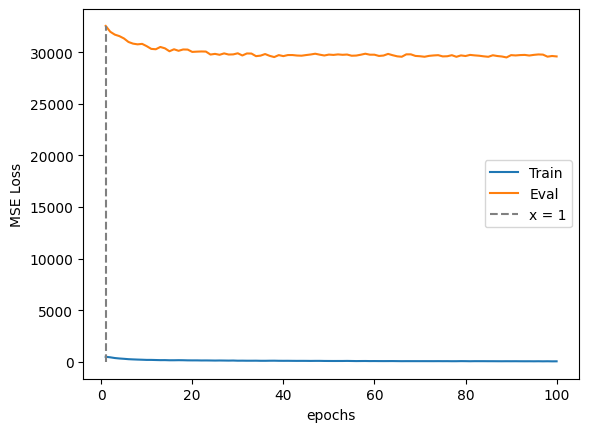

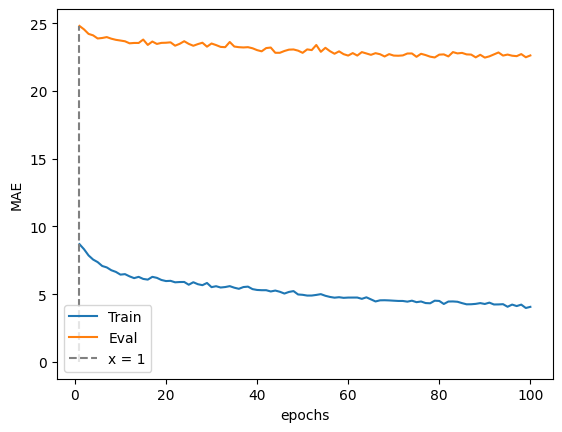

MAE on train set:  2.8651448639157153
min prediction: 0
max prediction: 101

MAE on test set:  24.32449517120281
Error <= 30: 92.27 %
min prediction: 0
max prediction: 93


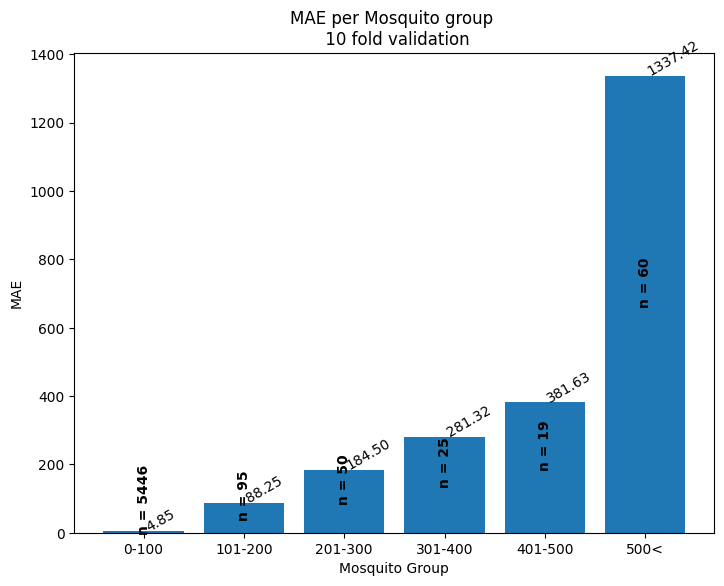

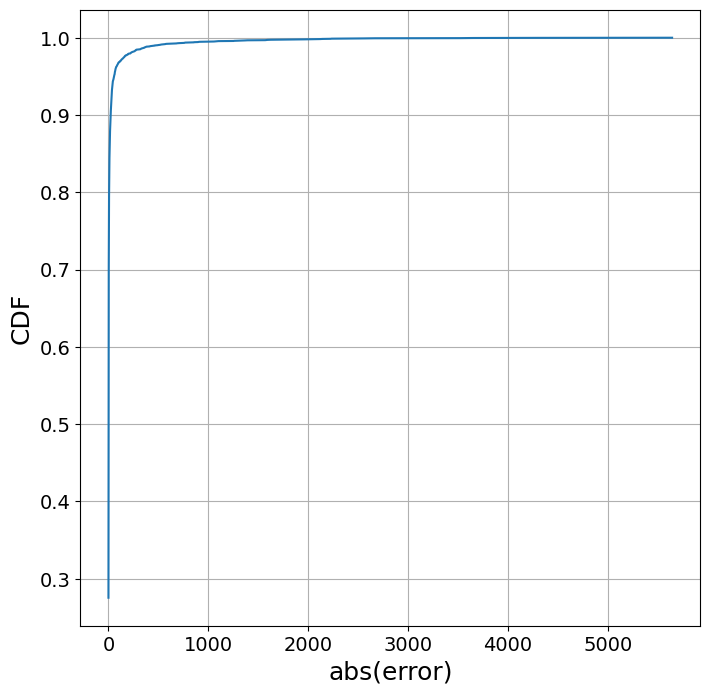

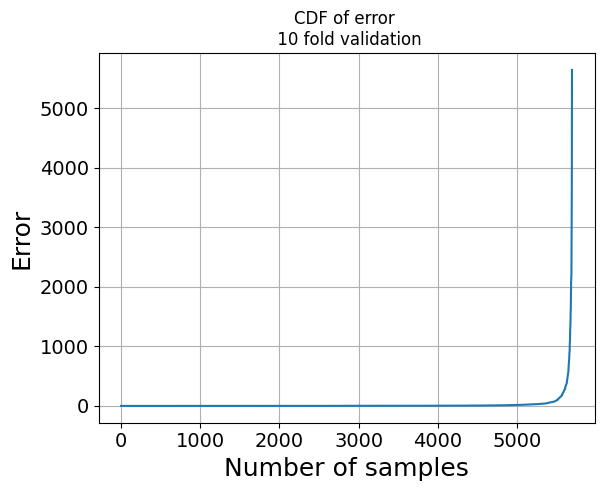

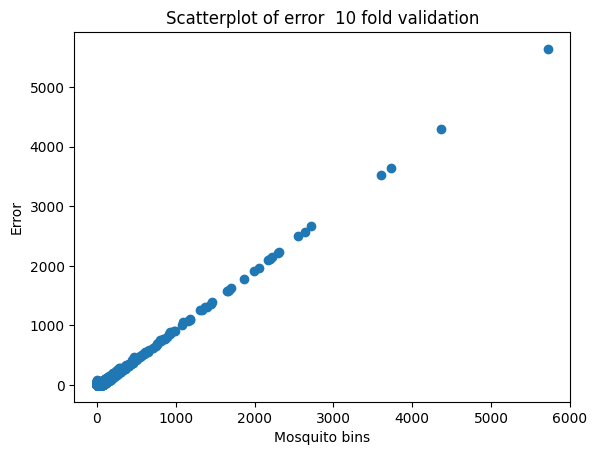

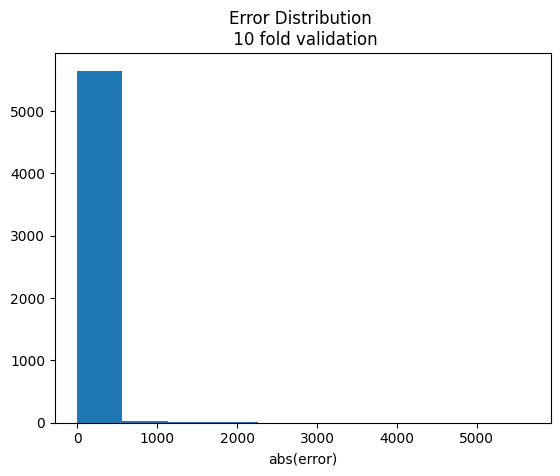

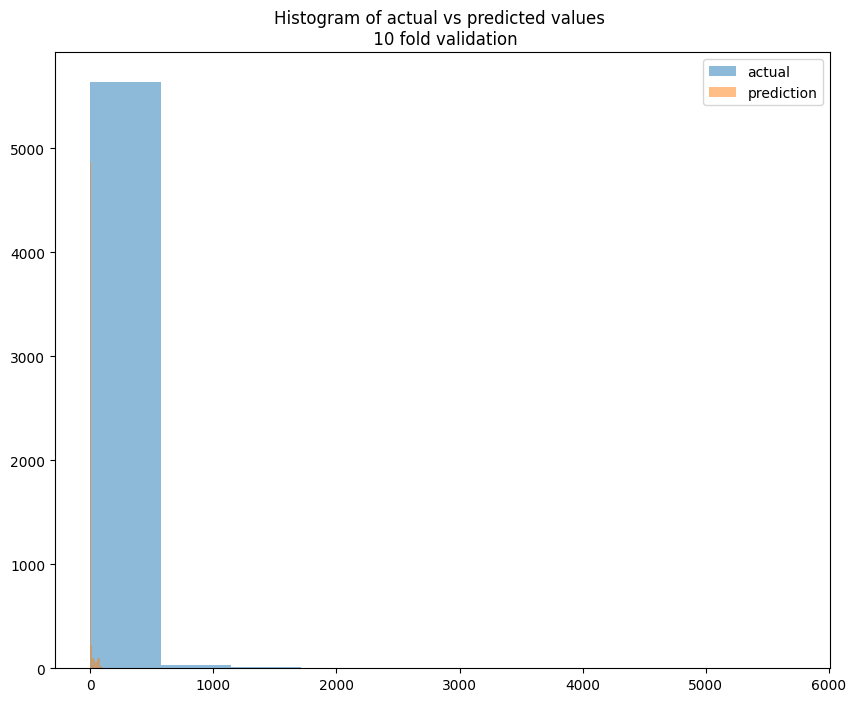

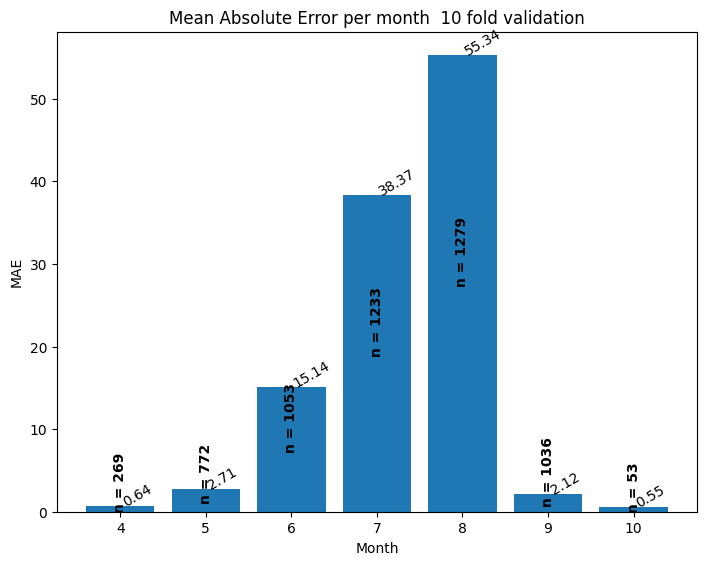

In [9]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 536.53018 | Val Loss: 17.00201 | Train Acc: 9.097| Val Acc: 2.857
Epoch 002: | Train Loss: 471.32766 | Val Loss: 15.90944 | Train Acc: 8.673| Val Acc: 2.857
Epoch 003: | Train Loss: 402.90768 | Val Loss: 18.67170 | Train Acc: 8.232| Val Acc: 3.286
Epoch 004: | Train Loss: 352.87849 | Val Loss: 19.66311 | Train Acc: 7.863| Val Acc: 3.429
Epoch 005: | Train Loss: 317.67405 | Val Loss: 20.52489 | Train Acc: 7.555| Val Acc: 3.571
Epoch 006: | Train Loss: 282.38788 | Val Loss: 26.38467 | Train Acc: 7.325| Val Acc: 4.143
Epoch 007: | Train Loss: 256.14311 | Val Loss: 58.09998 | Train Acc: 7.142| Val Acc: 5.286
Epoch 008: | Train Loss: 233.57540 | Val Loss: 50.96833 | Train Acc: 6.905| Val Acc: 5.143
Epoch 009: | Train Loss: 216.64243 | Val Loss: 54.26133 | Train Acc: 6.748| Val Acc: 5.286
Epoch 010: | Train Loss: 210.39492 | Val Loss: 51.82323 | Train Acc: 6.594| Val Acc: 5.143
Epoch 011: | Train Loss: 199.18355 | Val Loss: 49.17706 | Train Acc: 6.578| Val Acc: 5.143

Epoch 092: | Train Loss: 62.69905 | Val Loss: 10.21649 | Train Acc: 4.195| Val Acc: 1.857
Epoch 093: | Train Loss: 62.87473 | Val Loss: 10.45305 | Train Acc: 4.133| Val Acc: 1.857
Epoch 094: | Train Loss: 57.73657 | Val Loss: 11.75089 | Train Acc: 4.096| Val Acc: 2.286
Epoch 095: | Train Loss: 60.21669 | Val Loss: 10.48438 | Train Acc: 4.067| Val Acc: 2.000
Epoch 096: | Train Loss: 65.72860 | Val Loss: 12.21341 | Train Acc: 4.304| Val Acc: 2.571
Epoch 097: | Train Loss: 61.17912 | Val Loss: 14.31536 | Train Acc: 4.160| Val Acc: 2.714
Epoch 098: | Train Loss: 63.63558 | Val Loss: 14.04256 | Train Acc: 4.230| Val Acc: 2.857
Epoch 099: | Train Loss: 57.88423 | Val Loss: 12.57938 | Train Acc: 4.079| Val Acc: 2.571
Epoch 100: | Train Loss: 63.04825 | Val Loss: 10.78771 | Train Acc: 4.162| Val Acc: 2.000


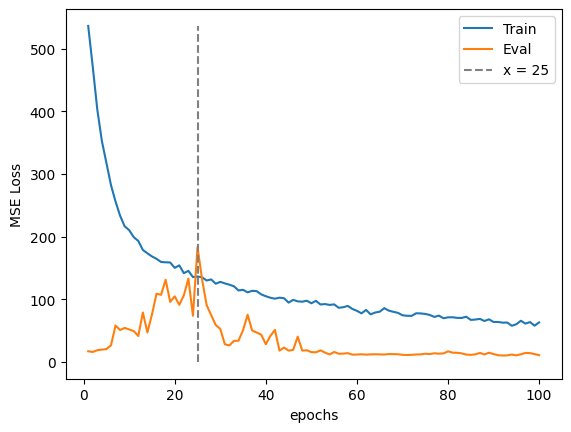

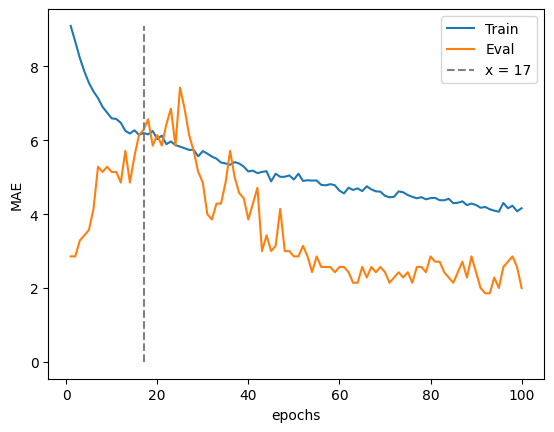

Epoch 001: | Train Loss: 76.10062 | Val Loss: 747.00104 | Train Acc: 4.508| Val Acc: 16.612
Epoch 002: | Train Loss: 76.47939 | Val Loss: 680.78027 | Train Acc: 4.480| Val Acc: 15.552
Epoch 003: | Train Loss: 76.54950 | Val Loss: 453.91074 | Train Acc: 4.486| Val Acc: 11.701
Epoch 004: | Train Loss: 72.57097 | Val Loss: 455.91779 | Train Acc: 4.447| Val Acc: 12.060
Epoch 005: | Train Loss: 72.44845 | Val Loss: 485.83041 | Train Acc: 4.423| Val Acc: 12.642
Epoch 006: | Train Loss: 68.76153 | Val Loss: 421.57471 | Train Acc: 4.316| Val Acc: 11.478
Epoch 007: | Train Loss: 67.70712 | Val Loss: 559.43079 | Train Acc: 4.270| Val Acc: 13.925
Epoch 008: | Train Loss: 67.66110 | Val Loss: 583.05945 | Train Acc: 4.430| Val Acc: 14.836
Epoch 009: | Train Loss: 65.69552 | Val Loss: 513.29797 | Train Acc: 4.274| Val Acc: 13.597
Epoch 010: | Train Loss: 63.92608 | Val Loss: 529.29218 | Train Acc: 4.221| Val Acc: 13.567
Epoch 011: | Train Loss: 59.82112 | Val Loss: 510.31937 | Train Acc: 4.134| Val 

Epoch 091: | Train Loss: 43.50683 | Val Loss: 573.04755 | Train Acc: 3.583| Val Acc: 14.343
Epoch 092: | Train Loss: 45.20852 | Val Loss: 567.27344 | Train Acc: 3.564| Val Acc: 13.582
Epoch 093: | Train Loss: 39.18568 | Val Loss: 526.31732 | Train Acc: 3.458| Val Acc: 12.821
Epoch 094: | Train Loss: 43.24015 | Val Loss: 496.77042 | Train Acc: 3.536| Val Acc: 13.015
Epoch 095: | Train Loss: 41.73498 | Val Loss: 534.29382 | Train Acc: 3.496| Val Acc: 14.224
Epoch 096: | Train Loss: 44.14375 | Val Loss: 466.40503 | Train Acc: 3.556| Val Acc: 13.343
Epoch 097: | Train Loss: 41.52964 | Val Loss: 451.22836 | Train Acc: 3.499| Val Acc: 12.448
Epoch 098: | Train Loss: 42.61730 | Val Loss: 567.01392 | Train Acc: 3.562| Val Acc: 14.358
Epoch 099: | Train Loss: 43.85052 | Val Loss: 620.73309 | Train Acc: 3.517| Val Acc: 14.970
Epoch 100: | Train Loss: 42.14190 | Val Loss: 590.56018 | Train Acc: 3.549| Val Acc: 15.075


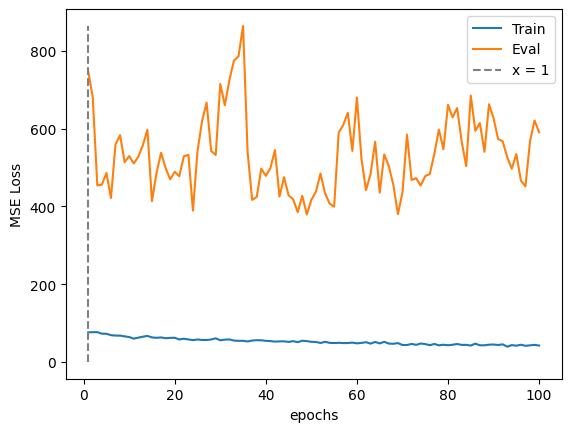

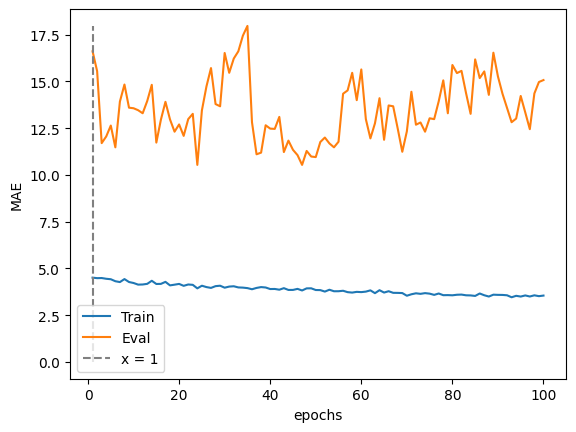

Epoch 001: | Train Loss: 67.49025 | Val Loss: 1129.76086 | Train Acc: 4.225| Val Acc: 25.197
Epoch 002: | Train Loss: 63.60521 | Val Loss: 1105.58752 | Train Acc: 4.056| Val Acc: 25.158
Epoch 003: | Train Loss: 57.75676 | Val Loss: 1108.94824 | Train Acc: 3.889| Val Acc: 24.684
Epoch 004: | Train Loss: 63.55771 | Val Loss: 1091.14026 | Train Acc: 4.058| Val Acc: 24.276
Epoch 005: | Train Loss: 57.35607 | Val Loss: 1130.53418 | Train Acc: 3.934| Val Acc: 24.605
Epoch 006: | Train Loss: 50.63524 | Val Loss: 1100.54065 | Train Acc: 3.741| Val Acc: 23.868
Epoch 007: | Train Loss: 54.56779 | Val Loss: 877.63086 | Train Acc: 3.868| Val Acc: 21.461
Epoch 008: | Train Loss: 52.98648 | Val Loss: 972.56262 | Train Acc: 3.779| Val Acc: 21.434
Epoch 009: | Train Loss: 52.34646 | Val Loss: 833.86658 | Train Acc: 3.801| Val Acc: 19.724
Epoch 010: | Train Loss: 52.89085 | Val Loss: 741.82520 | Train Acc: 3.768| Val Acc: 18.053
Epoch 011: | Train Loss: 55.58896 | Val Loss: 897.66107 | Train Acc: 3.883

Epoch 090: | Train Loss: 33.42944 | Val Loss: 789.35083 | Train Acc: 3.179| Val Acc: 16.961
Epoch 091: | Train Loss: 34.88558 | Val Loss: 688.25336 | Train Acc: 3.254| Val Acc: 15.303
Epoch 092: | Train Loss: 35.94815 | Val Loss: 922.86090 | Train Acc: 3.261| Val Acc: 18.039
Epoch 093: | Train Loss: 36.83480 | Val Loss: 1009.90350 | Train Acc: 3.280| Val Acc: 19.513
Epoch 094: | Train Loss: 34.41628 | Val Loss: 904.55981 | Train Acc: 3.206| Val Acc: 18.355
Epoch 095: | Train Loss: 36.74510 | Val Loss: 1009.07043 | Train Acc: 3.264| Val Acc: 19.487
Epoch 096: | Train Loss: 37.12713 | Val Loss: 893.17950 | Train Acc: 3.285| Val Acc: 18.171
Epoch 097: | Train Loss: 37.35973 | Val Loss: 1069.75049 | Train Acc: 3.310| Val Acc: 20.895
Epoch 098: | Train Loss: 34.75597 | Val Loss: 880.90350 | Train Acc: 3.188| Val Acc: 17.487
Epoch 099: | Train Loss: 32.20425 | Val Loss: 742.45245 | Train Acc: 3.131| Val Acc: 16.132
Epoch 100: | Train Loss: 34.42217 | Val Loss: 644.62347 | Train Acc: 3.193| V

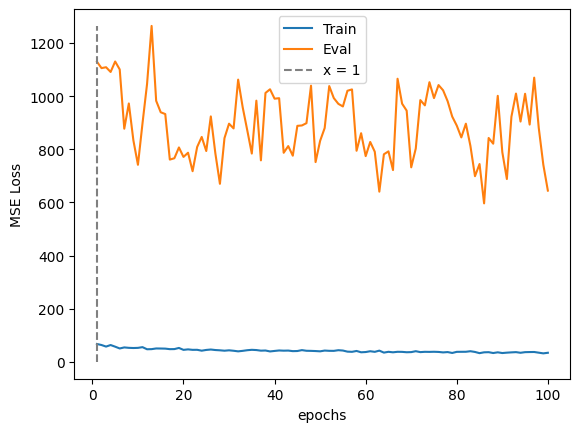

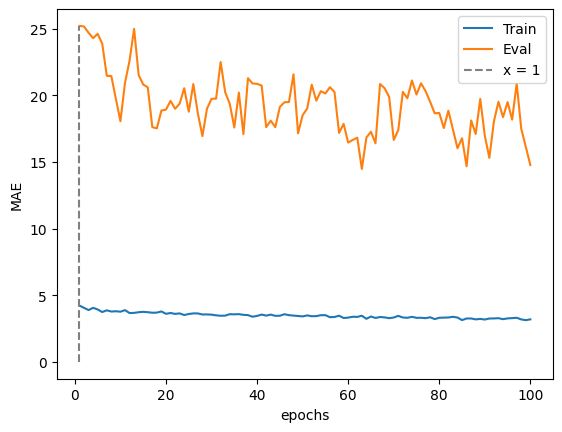

Epoch 001: | Train Loss: 59.94159 | Val Loss: 826.40228 | Train Acc: 3.826| Val Acc: 16.679
Epoch 002: | Train Loss: 49.88702 | Val Loss: 943.12781 | Train Acc: 3.685| Val Acc: 18.226
Epoch 003: | Train Loss: 50.37274 | Val Loss: 682.12189 | Train Acc: 3.688| Val Acc: 14.736
Epoch 004: | Train Loss: 52.60712 | Val Loss: 744.05017 | Train Acc: 3.693| Val Acc: 15.566
Epoch 005: | Train Loss: 50.59171 | Val Loss: 578.59723 | Train Acc: 3.652| Val Acc: 13.340
Epoch 006: | Train Loss: 47.33509 | Val Loss: 747.10913 | Train Acc: 3.608| Val Acc: 15.547
Epoch 007: | Train Loss: 44.16004 | Val Loss: 609.17841 | Train Acc: 3.475| Val Acc: 13.642
Epoch 008: | Train Loss: 46.33754 | Val Loss: 730.41864 | Train Acc: 3.567| Val Acc: 14.509
Epoch 009: | Train Loss: 48.31374 | Val Loss: 659.29346 | Train Acc: 3.645| Val Acc: 13.887
Epoch 010: | Train Loss: 45.24753 | Val Loss: 752.98022 | Train Acc: 3.478| Val Acc: 15.113
Epoch 011: | Train Loss: 43.13817 | Val Loss: 685.76422 | Train Acc: 3.532| Val 

Epoch 090: | Train Loss: 29.39227 | Val Loss: 773.01501 | Train Acc: 3.027| Val Acc: 14.925
Epoch 091: | Train Loss: 32.63901 | Val Loss: 488.61420 | Train Acc: 3.094| Val Acc: 11.377
Epoch 092: | Train Loss: 29.40274 | Val Loss: 726.53931 | Train Acc: 3.007| Val Acc: 14.245
Epoch 093: | Train Loss: 30.47694 | Val Loss: 1000.87024 | Train Acc: 3.013| Val Acc: 17.566
Epoch 094: | Train Loss: 30.89699 | Val Loss: 954.10999 | Train Acc: 2.991| Val Acc: 17.358
Epoch 095: | Train Loss: 31.92519 | Val Loss: 976.04187 | Train Acc: 3.074| Val Acc: 17.340
Epoch 096: | Train Loss: 31.22885 | Val Loss: 856.65417 | Train Acc: 3.055| Val Acc: 15.415
Epoch 097: | Train Loss: 30.77683 | Val Loss: 711.75519 | Train Acc: 3.060| Val Acc: 13.792
Epoch 098: | Train Loss: 29.63623 | Val Loss: 777.31561 | Train Acc: 2.999| Val Acc: 14.151
Epoch 099: | Train Loss: 31.35965 | Val Loss: 1079.83813 | Train Acc: 3.022| Val Acc: 19.019
Epoch 100: | Train Loss: 29.12143 | Val Loss: 1000.85590 | Train Acc: 2.973| V

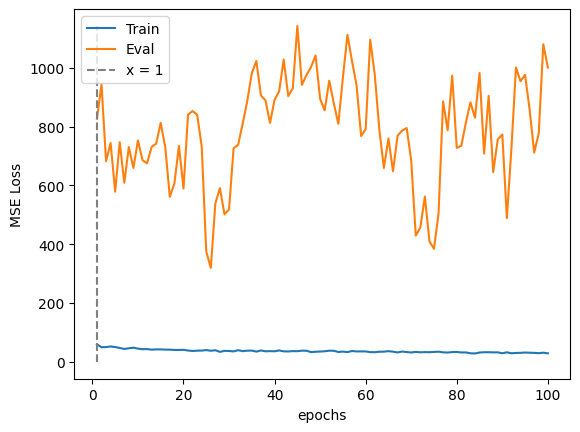

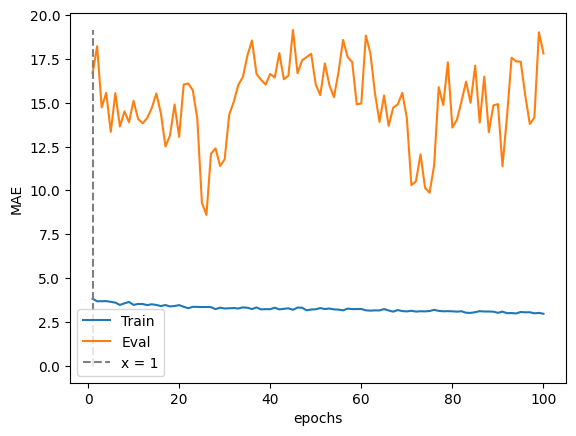

Epoch 001: | Train Loss: 56.28155 | Val Loss: 14.01297 | Train Acc: 3.646| Val Acc: 1.380
Epoch 002: | Train Loss: 51.26645 | Val Loss: 17.63294 | Train Acc: 3.578| Val Acc: 1.640
Epoch 003: | Train Loss: 47.53801 | Val Loss: 13.62889 | Train Acc: 3.420| Val Acc: 1.520
Epoch 004: | Train Loss: 47.56222 | Val Loss: 13.82939 | Train Acc: 3.423| Val Acc: 1.380
Epoch 005: | Train Loss: 41.95819 | Val Loss: 18.67978 | Train Acc: 3.341| Val Acc: 1.680
Epoch 006: | Train Loss: 36.46602 | Val Loss: 13.95806 | Train Acc: 3.198| Val Acc: 1.430
Epoch 007: | Train Loss: 39.31299 | Val Loss: 12.47240 | Train Acc: 3.278| Val Acc: 1.400
Epoch 008: | Train Loss: 39.23597 | Val Loss: 13.13126 | Train Acc: 3.265| Val Acc: 1.330
Epoch 009: | Train Loss: 37.72103 | Val Loss: 13.86426 | Train Acc: 3.253| Val Acc: 1.350
Epoch 010: | Train Loss: 38.04648 | Val Loss: 12.53151 | Train Acc: 3.257| Val Acc: 1.220
Epoch 011: | Train Loss: 37.56953 | Val Loss: 12.31206 | Train Acc: 3.233| Val Acc: 1.300
Epoch 012:

Epoch 093: | Train Loss: 26.74041 | Val Loss: 15.90402 | Train Acc: 2.854| Val Acc: 1.470
Epoch 094: | Train Loss: 28.47138 | Val Loss: 16.72284 | Train Acc: 2.904| Val Acc: 1.520
Epoch 095: | Train Loss: 28.09198 | Val Loss: 15.40619 | Train Acc: 2.904| Val Acc: 1.390
Epoch 096: | Train Loss: 25.82569 | Val Loss: 17.72989 | Train Acc: 2.811| Val Acc: 1.540
Epoch 097: | Train Loss: 26.35012 | Val Loss: 18.86480 | Train Acc: 2.830| Val Acc: 1.570
Epoch 098: | Train Loss: 28.22610 | Val Loss: 18.21055 | Train Acc: 2.883| Val Acc: 1.590
Epoch 099: | Train Loss: 26.49061 | Val Loss: 14.93332 | Train Acc: 2.802| Val Acc: 1.370
Epoch 100: | Train Loss: 25.58687 | Val Loss: 18.60227 | Train Acc: 2.784| Val Acc: 1.480


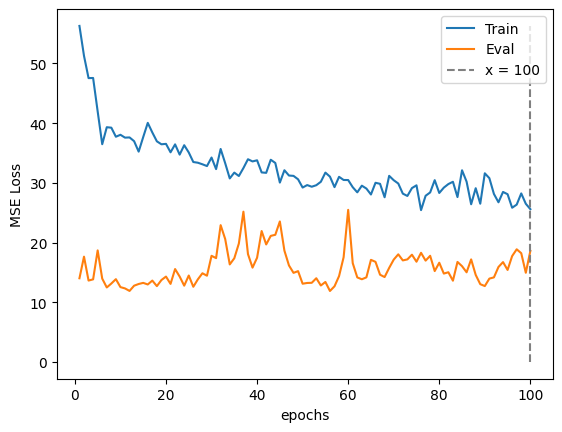

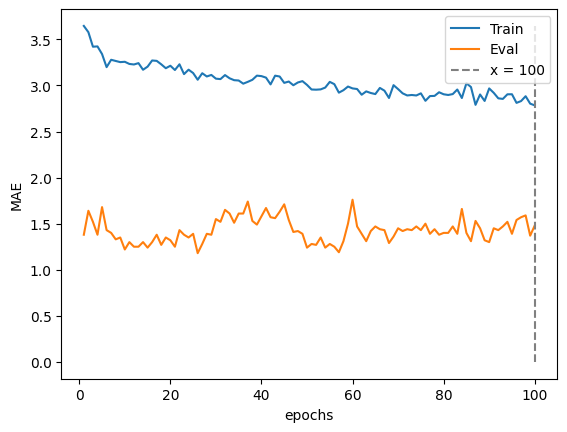

Epoch 001: | Train Loss: 43.93147 | Val Loss: 0.20833 | Train Acc: 3.329| Val Acc: 0.208
Epoch 002: | Train Loss: 35.69910 | Val Loss: 0.20833 | Train Acc: 3.118| Val Acc: 0.208
Epoch 003: | Train Loss: 37.04483 | Val Loss: 0.20833 | Train Acc: 3.160| Val Acc: 0.208
Epoch 004: | Train Loss: 38.13526 | Val Loss: 0.20833 | Train Acc: 3.180| Val Acc: 0.208
Epoch 005: | Train Loss: 32.61488 | Val Loss: 0.20833 | Train Acc: 3.058| Val Acc: 0.208
Epoch 006: | Train Loss: 35.55829 | Val Loss: 0.20833 | Train Acc: 3.086| Val Acc: 0.208
Epoch 007: | Train Loss: 32.90789 | Val Loss: 0.20833 | Train Acc: 3.019| Val Acc: 0.208
Epoch 008: | Train Loss: 32.80378 | Val Loss: 0.20833 | Train Acc: 3.066| Val Acc: 0.208
Epoch 009: | Train Loss: 33.54836 | Val Loss: 0.20833 | Train Acc: 3.098| Val Acc: 0.208
Epoch 010: | Train Loss: 29.12512 | Val Loss: 0.20833 | Train Acc: 2.939| Val Acc: 0.208
Epoch 011: | Train Loss: 33.25356 | Val Loss: 0.20833 | Train Acc: 2.998| Val Acc: 0.208
Epoch 012: | Train Lo

Epoch 094: | Train Loss: 25.19143 | Val Loss: 0.94370 | Train Acc: 2.704| Val Acc: 0.333
Epoch 095: | Train Loss: 26.95756 | Val Loss: 0.55892 | Train Acc: 2.727| Val Acc: 0.292
Epoch 096: | Train Loss: 24.07129 | Val Loss: 0.39719 | Train Acc: 2.713| Val Acc: 0.250
Epoch 097: | Train Loss: 26.68666 | Val Loss: 0.34747 | Train Acc: 2.719| Val Acc: 0.250
Epoch 098: | Train Loss: 24.03424 | Val Loss: 0.54900 | Train Acc: 2.688| Val Acc: 0.292
Epoch 099: | Train Loss: 22.27785 | Val Loss: 0.41962 | Train Acc: 2.572| Val Acc: 0.250
Epoch 100: | Train Loss: 25.75648 | Val Loss: 1.28113 | Train Acc: 2.739| Val Acc: 0.375


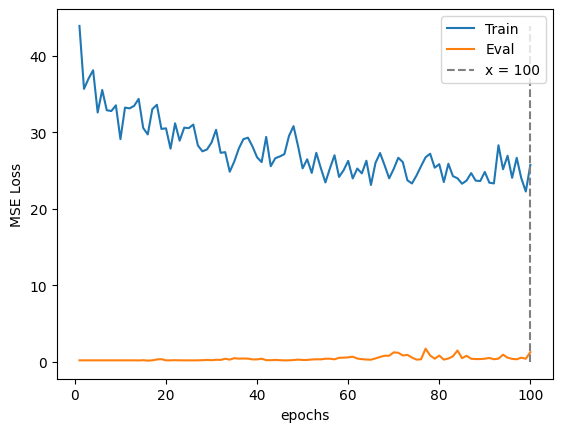

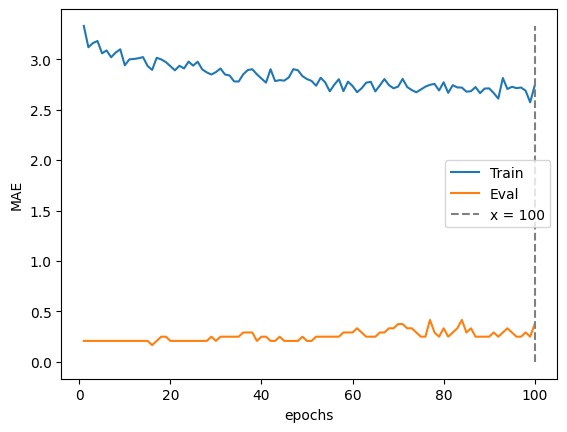

MAE on train set:  2.252056457732585
min prediction: 0
max prediction: 99

MAE on test set:  9.929663608562691
Error <= 30: 88.99 %
min prediction: 0
max prediction: 82


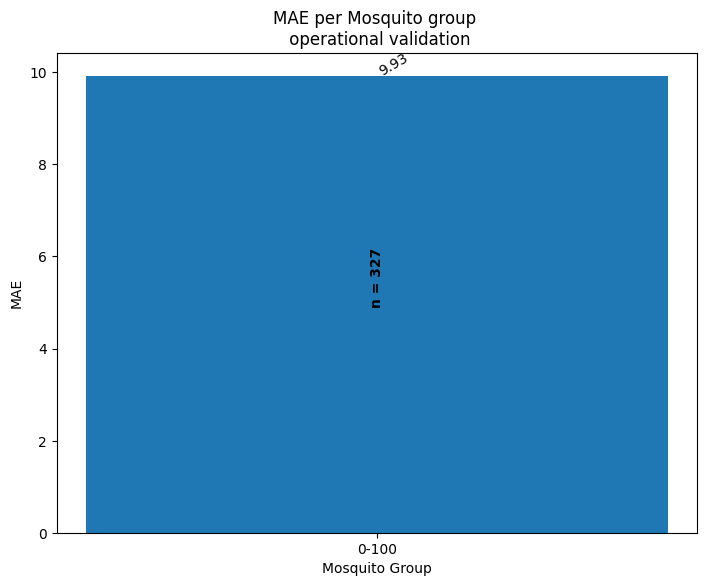

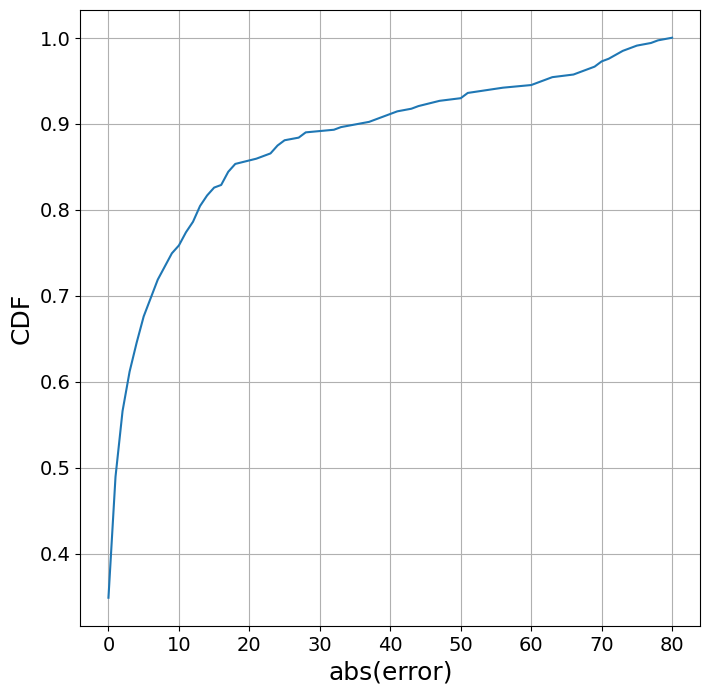

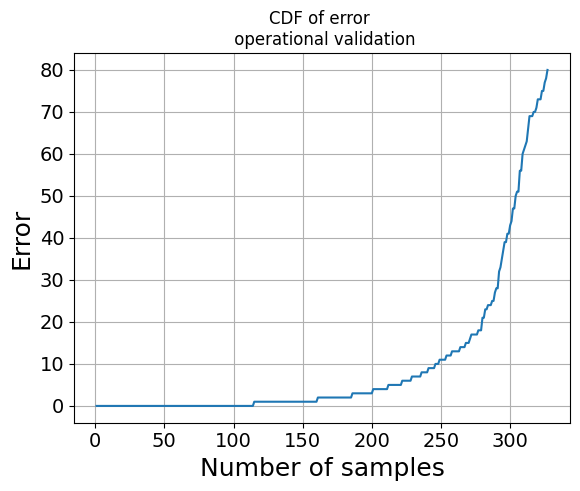

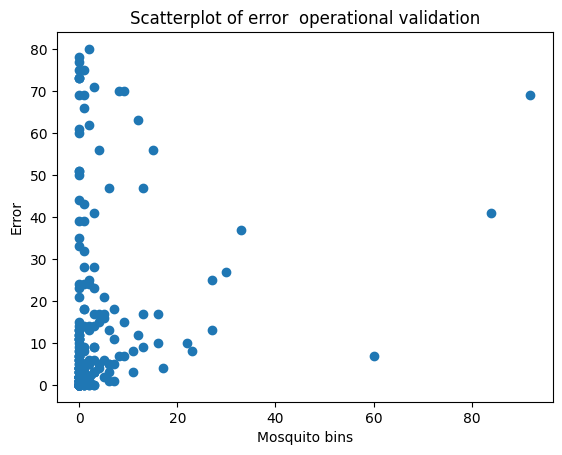

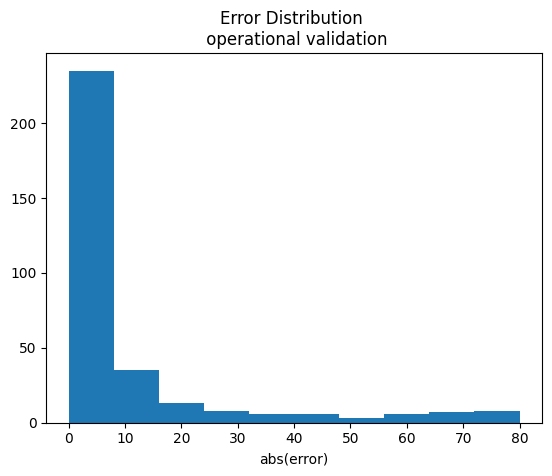

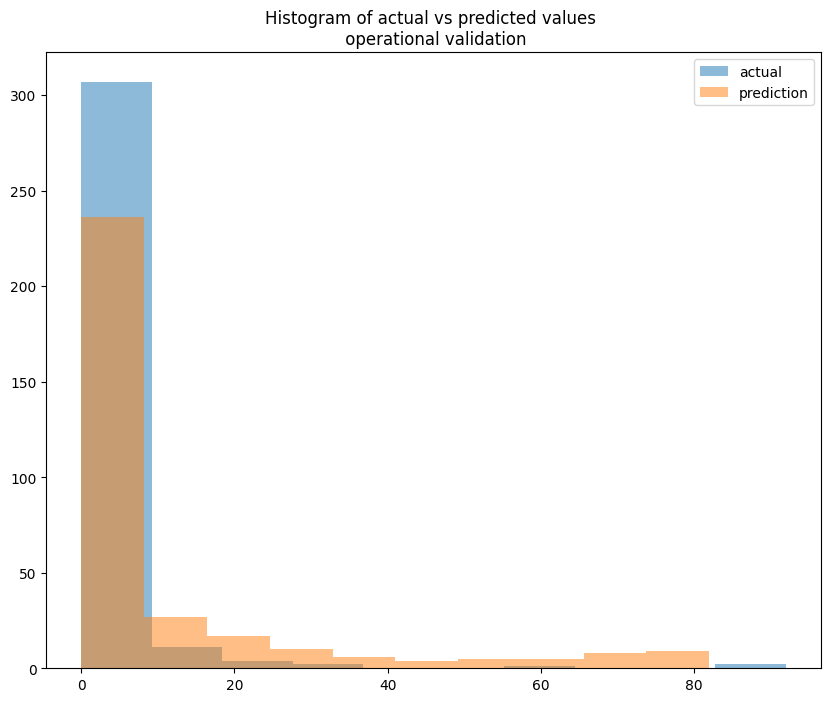

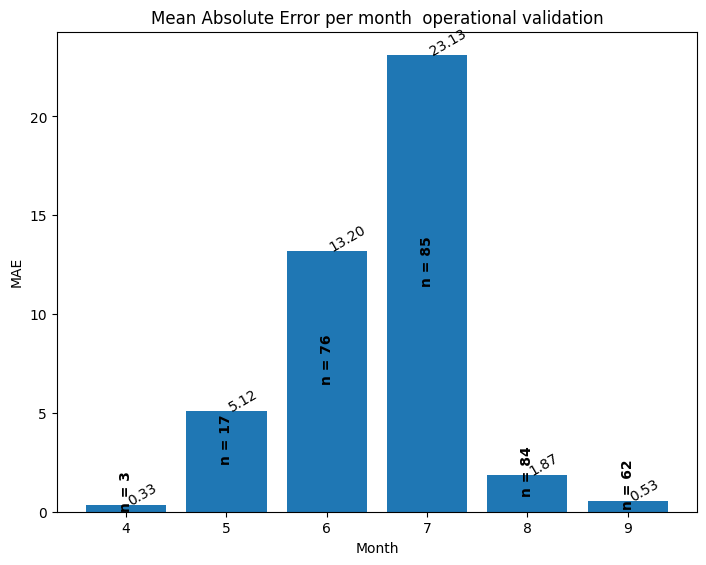

In [10]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)